In [3]:
import pandas as pd
from numpy import nan, infty

# Gorilla assessment

This is the assessment for an job application for Gorilla. 



## Importing the data

In [4]:
consumption=pd.read_excel("data.xlsx", sheet_name="Forecasted Consumption")
meters=pd.read_excel("data.xlsx", sheet_name="Meter List")
rates=pd.read_excel("data.xlsx", sheet_name="Rates")

In [5]:
for x in (consumption,rates,meters): 
    print(x.dtypes)

Date        datetime64[ns]
Meter ID             int64
kWh                float64
dtype: object
Date                     datetime64[ns]
Exit Zone                        object
Annual Quantity (Min)             int64
Annual Quantity (Max)           float64
Rate (p/kWh)                    float64
dtype: object
Meter ID                  int64
Exit Zone                object
Annual Quantity (kWh)     int64
dtype: object


In [6]:
rates

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-04-01,EA1,0,73200.0,0.028700
1,2020-04-01,EA2,0,73200.0,0.028700
2,2020-04-01,EA3,0,73200.0,0.028700
3,2020-04-01,EA4,0,73200.0,0.028700
4,2020-04-01,EM1,0,73200.0,0.028700
...,...,...,...,...,...
1021,2024-04-01,WA1,732000,NaN,0.384755
1022,2024-04-01,WA2,732000,NaN,0.384755
1023,2024-04-01,WM1,732000,NaN,0.445482
1024,2024-04-01,WM2,732000,NaN,0.445482


In [7]:
consumption

,Date,Meter ID,kWh
0,2020-10-01,1000000603,28.782474
1,2020-10-01,10588707,126.367711
2,2020-10-01,10626610,326.240595
3,2020-10-02,1000000603,26.690797
4,2020-10-02,10588707,118.322449
...,...,...,...
2185,2022-09-29,10588707,77.744203
2186,2022-09-29,10626610,270.357196
2187,2022-09-30,1000000603,17.927143
2188,2022-09-30,10588707,73.335098


In [8]:
meters

,Meter ID,Exit Zone,Annual Quantity (kWh)
0,1000000603,SC1,12337
1,10588707,EM2,75123
2,10626610,NW1,151779


## Excersise 1. Transportation Distribution Charge

> A **Transportation Distribution Charge** is a charge levied by the Distribution companies for the use of their lower pressure pipelines. The charge covers the cost of physically transporting the gas through the pipeline.  The cost is variable in time and is determined by the Exit Zone (a regional code) and the (estimated) rolling consumption quantity of the meter.

1. Calculate the **total cost per meter** by summing the costs per day for the full period of
   the forecast (2020-10-01 to 2022-09-30) and converting to £ (1p = 0.01£),
2. Calculate the **total consumption** by summing the forecasted consumption for the full
   period.

First, we need a merge on the data, with the necessary data fields: meter id, correct rate and consumption.

### First merge: add meter info to the consumption
To connect the `consumption` to the `rates`, we need to have the field _Exit zone_, so first we merge with `meters`. In this case, this is a left join, because we only need meters that are in the `consumption` table (and we don't want to throw away consumption data, should the correct meter not be in the `meters` table). 

In [9]:
merged_data=pd.merge(consumption, meters, on="Meter ID", how="left")
merged_data.sort_values("Date")

,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh)
0,2020-10-01,1000000603,28.782474,SC1,12337
1,2020-10-01,10588707,126.367711,EM2,75123
2,2020-10-01,10626610,326.240595,NW1,151779
3,2020-10-02,1000000603,26.690797,SC1,12337
4,2020-10-02,10588707,118.322449,EM2,75123
...,...,...,...,...,...
2184,2022-09-29,1000000603,19.263599,SC1,12337
2186,2022-09-29,10626610,270.357196,NW1,151779
2188,2022-09-30,10588707,73.335098,EM2,75123
2187,2022-09-30,1000000603,17.927143,SC1,12337


### Second merge: the rates
Now let's take a look at the `rates` table.

In [10]:
rates.head()

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-04-01,EA1,0,73200.0,0.0287
1,2020-04-01,EA2,0,73200.0,0.0287
2,2020-04-01,EA3,0,73200.0,0.0287
3,2020-04-01,EA4,0,73200.0,0.0287
4,2020-04-01,EM1,0,73200.0,0.0287


In [11]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1026 non-null   datetime64[ns]
 1   Exit Zone              1026 non-null   object        
 2   Annual Quantity (Min)  1026 non-null   int64         
 3   Annual Quantity (Max)  684 non-null    float64       
 4   Rate (p/kWh)           1026 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 40.2+ KB


Let's look at all available data for one day.

In [12]:
rates[rates.Date=="2020-04-01"].sort_values(["Exit Zone", "Annual Quantity (Min)"])

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-04-01,EA1,0,73200.0,0.0287
38,2020-04-01,EA1,73200,732000.0,0.0228
76,2020-04-01,EA1,732000,NaN,0.1820
1,2020-04-01,EA2,0,73200.0,0.0287
39,2020-04-01,EA2,73200,732000.0,0.0228
...,...,...,...,...,...
74,2020-04-01,WM2,73200,732000.0,0.0292
112,2020-04-01,WM2,732000,NaN,0.3927
37,2020-04-01,WM3,0,73200.0,0.0326
75,2020-04-01,WM3,73200,732000.0,0.0292


In order to compare later on, I replace the NaNs for max annual rate with ininity, because that's what the NaNs mean here.

In [13]:
rates["Annual Quantity (Max)"]=rates["Annual Quantity (Max)"].fillna(infty)

Next merge, this is a many to many relationship for date and exit zone, between this table and the `rates` dataframe.

In [14]:
merged_rates=pd.merge(merged_data, rates, how="left", on = ["Date", "Exit Zone"])
merged_rates.sort_values("Date")

,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh),Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-10-01,1000000603,28.782474,SC1,12337,0.0,73200.0,0.0333
1,2020-10-01,1000000603,28.782474,SC1,12337,73200.0,732000.0,0.0297
2,2020-10-01,1000000603,28.782474,SC1,12337,732000.0,inf,0.2431
3,2020-10-01,10588707,126.367711,EM2,75123,0.0,73200.0,0.0287
4,2020-10-01,10588707,126.367711,EM2,75123,73200.0,732000.0,0.0228
...,...,...,...,...,...,...,...,...
2208,2022-09-29,1000000603,19.263599,SC1,12337,NaN,NaN,NaN
2210,2022-09-29,10626610,270.357196,NW1,151779,NaN,NaN,NaN
2212,2022-09-30,10588707,73.335098,EM2,75123,NaN,NaN,NaN
2211,2022-09-30,1000000603,17.927143,SC1,12337,NaN,NaN,NaN


So apparently, not all dates match exactly, therefore there are a lot of NaNs...

In [15]:
merged_rates.isna().sum()

Date                        0
Meter ID                    0
kWh                         0
Exit Zone                   0
Annual Quantity (kWh)       0
Annual Quantity (Min)    2178
Annual Quantity (Max)    2178
Rate (p/kWh)             2178
dtype: int64

Not every date that's in the `consumption` table is represented in the `rates` table. Rather than throwing away everything, we want to use the closest previous rate. Luckily, there is `pd.merge_asof()` for that.

In [16]:
merged_rates = pd.merge_asof(
    merged_data.sort_values(
        "Date"
    ),  # documentation says that both dataframes should be sorted for this
    rates.sort_values("Date"),
    by="Exit Zone",  # also merge on exit zone, before the asof merge is performed
    on="Date",
    direction="backward",  # "Selects the last row in the right DataFrame whose 'on' key is less than or equal to the left's key.""
)
merged_rates.sort_values("Date")

,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh),Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-10-01,1000000603,28.782474,SC1,12337,0,73200.0,0.033300
1,2020-10-01,10588707,126.367711,EM2,75123,73200,732000.0,0.022800
2,2020-10-01,10626610,326.240595,NW1,151779,0,73200.0,0.033900
3,2020-10-02,1000000603,26.690797,SC1,12337,0,73200.0,0.033300
4,2020-10-02,10588707,118.322449,EM2,75123,73200,732000.0,0.022800
...,...,...,...,...,...,...,...,...
2184,2022-09-29,10588707,77.744203,EM2,75123,73200,732000.0,0.024358
2186,2022-09-29,10626610,270.357196,NW1,151779,0,73200.0,0.036022
2188,2022-09-30,1000000603,17.927143,SC1,12337,0,73200.0,0.034706
2187,2022-09-30,10588707,73.335098,EM2,75123,73200,732000.0,0.024358


Unfortunately, now we lost the annual quantity intervals, as merge_asof only does a left join (and thus selects a interval arbitrarily). For the interval, we actually should also do a `merge_asof()`. Starting with that would only keep one date → same problem. 

The only solution I can now think of for now, is to first do a full outer merge between consumption and rates, and then filter afterwards. So let's start over.

In [17]:
full_merge = pd.merge(
    merged_data, rates, on="Exit Zone", how="left", suffixes=("_consumption", "_rates")
)
full_merge

,Date_consumption,Meter ID,kWh,Exit Zone,Annual Quantity (kWh),Date_rates,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-10-01,1000000603,28.782474,SC1,12337,2020-04-01,0,73200.0,0.033300
1,2020-10-01,1000000603,28.782474,SC1,12337,2020-04-01,73200,732000.0,0.029700
2,2020-10-01,1000000603,28.782474,SC1,12337,2020-04-01,732000,inf,0.243100
3,2020-10-01,1000000603,28.782474,SC1,12337,2020-10-01,0,73200.0,0.033300
4,2020-10-01,1000000603,28.782474,SC1,12337,2020-10-01,73200,732000.0,0.029700
...,...,...,...,...,...,...,...,...,...
59125,2022-09-30,10626610,263.375674,NW1,151779,2023-10-01,73200,732000.0,0.031236
59126,2022-09-30,10626610,263.375674,NW1,151779,2023-10-01,732000,inf,0.271146
59127,2022-09-30,10626610,263.375674,NW1,151779,2024-04-01,0,73200.0,0.038320
59128,2022-09-30,10626610,263.375674,NW1,151779,2024-04-01,73200,732000.0,0.032216


We only want the rows were the annual quantity matches the correct annual rate interval.

In [18]:
full_merge_quant = full_merge.query(
    "`Annual Quantity (Max)`>=`Annual Quantity (kWh)`>=`Annual Quantity (Min)`"
)

Now we filter on the date. `merge_asof` is not possible anymore, so I use normal filtering. We need the last date from the rates. First selecting everything before the consumption date, then sorting by consumption date, and then taking the last one, accomplishes this.

In [19]:
full_merge_date=full_merge_quant[
    full_merge_quant.Date_consumption >= full_merge_quant.Date_rates
].sort_values("Date_rates").groupby(["Date_consumption", "Meter ID"]).last()
full_merge_date

kWh Exit Zone  Annual Quantity (kWh)  \
Date_consumption Meter ID                                                  
2020-10-01       10588707    126.367711       EM2                  75123   
                 10626610    326.240595       NW1                 151779   
                 1000000603   28.782474       SC1                  12337   
2020-10-02       10588707    118.322449       EM2                  75123   
                 10626610    316.860290       NW1                 151779   
...                                 ...       ...                    ...   
2022-09-29       10626610    270.357196       NW1                 151779   
                 1000000603   19.263599       SC1                  12337   
2022-09-30       10588707     73.335098       EM2                  75123   
                 10626610    263.375674       NW1                 151779   
                 1000000603   17.927143       SC1                  12337   

                            Date_rates  Annual Quantity (Min)  \
Date_consumption Meter ID                                       
2020-10-01       10588707   2020-10-01                  73200   
                 10626610   2020-10-01                  73200   
                 1000000603 2020-10-01                      0   
2020-10-02       10588707   2020-10-01                  73200   
                 10626610   2020-10-01                  73200   
...                                ...                    ...   
2022-09-29       10626610   2022-04-01                  73200   
                 1000000603 2022-04-01                      0   
2022-09-30       10588707   2022-04-01                  73200   
                 10626610   2022-04-01                  73200   
                 1000000603 2022-04-01                      0   

                             Annual Quantity (Max)  Rate (p/kWh)  
Date_consumption Meter ID                                         
2020-10-01       10588707                 732000.0      0.022800  
                 10626610                 732000.0      0.028500  
                 1000000603                73200.0      0.033300  
2020-10-02       10588707                 732000.0      0.022800  
                 10626610                 732000.0      0.028500  
...                                            ...           ...  
2022-09-29       10626610                 732000.0      0.030284  
                 1000000603                73200.0      0.034706  
2022-09-30       10588707                 732000.0      0.024358  
                 10626610                 732000.0      0.030284  
                 1000000603                73200.0      0.034706  

[2190 rows x 7 columns]

Sanity check, when are the rates changed?

In [20]:
pd.unique(rates.Date)

array(['2020-04-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2022-04-01T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2023-04-01T00:00:00.000000000', '2023-10-01T00:00:00.000000000',
       '2024-04-01T00:00:00.000000000'], dtype='datetime64[ns]')

The rates are changed every April and October, so the results above seem to be correct.

At last, we can generate the requested calculations.

In [21]:
full_merge_date["Total Cost"]=full_merge_date["kWh"]*full_merge_date["Rate (p/kWh)"]
full_merge_date

kWh Exit Zone  Annual Quantity (kWh)  \
Date_consumption Meter ID                                                  
2020-10-01       10588707    126.367711       EM2                  75123   
                 10626610    326.240595       NW1                 151779   
                 1000000603   28.782474       SC1                  12337   
2020-10-02       10588707    118.322449       EM2                  75123   
                 10626610    316.860290       NW1                 151779   
...                                 ...       ...                    ...   
2022-09-29       10626610    270.357196       NW1                 151779   
                 1000000603   19.263599       SC1                  12337   
2022-09-30       10588707     73.335098       EM2                  75123   
                 10626610    263.375674       NW1                 151779   
                 1000000603   17.927143       SC1                  12337   

                            Date_rates  Annual Quantity (Min)  \
Date_consumption Meter ID                                       
2020-10-01       10588707   2020-10-01                  73200   
                 10626610   2020-10-01                  73200   
                 1000000603 2020-10-01                      0   
2020-10-02       10588707   2020-10-01                  73200   
                 10626610   2020-10-01                  73200   
...                                ...                    ...   
2022-09-29       10626610   2022-04-01                  73200   
                 1000000603 2022-04-01                      0   
2022-09-30       10588707   2022-04-01                  73200   
                 10626610   2022-04-01                  73200   
                 1000000603 2022-04-01                      0   

                             Annual Quantity (Max)  Rate (p/kWh)  Total Cost  
Date_consumption Meter ID                                                     
2020-10-01       10588707                 732000.0      0.022800    2.881184  
                 10626610                 732000.0      0.028500    9.297857  
                 1000000603                73200.0      0.033300    0.958456  
2020-10-02       10588707                 732000.0      0.022800    2.697752  
                 10626610                 732000.0      0.028500    9.030518  
...                                            ...           ...         ...  
2022-09-29       10626610                 732000.0      0.030284    8.187461  
                 1000000603                73200.0      0.034706    0.668562  
2022-09-30       10588707                 732000.0      0.024358    1.786285  
                 10626610                 732000.0      0.030284    7.976033  
                 1000000603                73200.0      0.034706    0.622179  

[2190 rows x 8 columns]

In [22]:
result = full_merge_date.groupby("Meter ID")[["kWh", "Total Cost"]].sum()
result.columns = ("Total Estimated Consumption (kWh)", "Total Cost (£)")

Finally, the result can get rounded to two decimals.

In [23]:
result["Total Cost (£)"]=result["Total Cost (£)"].round(2)
result["Total Estimated Consumption (kWh)"]=result["Total Estimated Consumption (kWh)"].round(0)
result

,Total Estimated Consumption (kWh),Total Cost (£)
Meter ID,,
10588707,122450.0,2849.81
10626610,303558.0,8823.66
1000000603,24674.0,826.78


## Excersise 2: mock meters

*Write a function that generates a list of random meters of any size. Examples of valid
Exit Zones can be found in the rate table. You may randomly generate the Annual
Quantity.*

In [24]:
exit_zones=pd.unique(rates["Exit Zone"])
exit_zones

array(['EA1', 'EA2', 'EA3', 'EA4', 'EM1', 'EM2', 'EM3', 'EM4', 'LC', 'LO',
       'LS', 'LT', 'LW', 'NE1', 'NE2', 'NE3', 'NO1', 'NO2', 'NT1', 'NT2',
       'NT3', 'NW1', 'NW2', 'SC1', 'SC2', 'SC4', 'SE1', 'SE2', 'SO1',
       'SO2', 'SW1', 'SW2', 'SW3', 'WA1', 'WA2', 'WM1', 'WM2', 'WM3'],
      dtype=object)

In [25]:
meters

,Meter ID,Exit Zone,Annual Quantity (kWh)
0,1000000603,SC1,12337
1,10588707,EM2,75123
2,10626610,NW1,151779


Let's import some numpy functions.

In [26]:
from numpy.random import random, choice, randint, sample
from numpy import arange
from typing import Tuple

In [27]:
def generate_meters(
    n: int, annual_kwh_range: Tuple[int, int] = (5000, 1_000_000)
) -> pd.DataFrame:
    """Generates a Dataframe of random meters, with length n. 
    Optionally choose the range for the random annual quantity."""
    
    zones = choice(exit_zones, n, replace=True)
    aqs = randint(annual_kwh_range[0], annual_kwh_range[1], n)
    result=pd.DataFrame({"Meter ID": arange(n), "Exit Zone": zones, "Annual Quantity (kWh)": aqs})

    return result

In [28]:
generate_meters(10)

,Meter ID,Exit Zone,Annual Quantity (kWh)
0,0,SC1,891937
1,1,NW1,112225
2,2,NE1,269561
3,3,EM1,377058
4,4,EA3,488004
5,5,NE2,967533
6,6,EM4,281862
7,7,LT,64513
8,8,SC2,913855
9,9,SW1,45488


## Excersise 3: Mock consumption data
*Write a function that generates mock consumption data given a list of meters and a
start and end date.*

In [29]:
consumption

,Date,Meter ID,kWh
0,2020-10-01,1000000603,28.782474
1,2020-10-01,10588707,126.367711
2,2020-10-01,10626610,326.240595
3,2020-10-02,1000000603,26.690797
4,2020-10-02,10588707,118.322449
...,...,...,...
2185,2022-09-29,10588707,77.744203
2186,2022-09-29,10626610,270.357196
2187,2022-09-30,1000000603,17.927143
2188,2022-09-30,10588707,73.335098


In [30]:
from numpy import datetime64, arange

In [31]:
def generate_consumption(
    meters: pd.DataFrame, start_date: str, end_date: str
) -> pd.DataFrame:
    """Generates random mock consumption data."""

    # convert dates to numpy dates
    start_date = datetime64(start_date)
    end_date = datetime64(end_date)

    # dates for every day between start and end
    dates = pd.DataFrame({"Date": arange(start_date, end_date)})

    # Now for every date make a row for each meter
    result = pd.merge(dates, meters, how="cross")

    # Create random consumption in the right order of magnitude:
    # 1/365 of annual rate with ±20% variation
    result["kWh"] = (
        result["Annual Quantity (kWh)"]
        .divide(365.25)  # normal consumption per day
        .multiply(0.4 * sample(len(result)) + 0.8)  # introduce random variety
        .round()
        .astype(int)  # example is also integer
    )

    # we can drop superfluous cols now
    return result.drop(["Exit Zone", "Annual Quantity (kWh)"], axis=1)

In [32]:
generate_consumption(generate_meters(5), "2022-10-01", "2022-11-01")

,Date,Meter ID,kWh
0,2022-10-01,0,1588
1,2022-10-01,1,1814
2,2022-10-01,2,1248
3,2022-10-01,3,2044
4,2022-10-01,4,2490
...,...,...,...
150,2022-10-31,0,1560
151,2022-10-31,1,1707
152,2022-10-31,2,1330
153,2022-10-31,3,1797


## Excersise 4: Putting it all together & benchmarking

*Write a function that takes as an input a meter list and a consumption table and
returns the Transportation cost table. Benchmark this function using meter lists of
different sizes. Try longer periods as well? How does the function scale?*

So now we put all the steps from ex. 1 in one function.

In [103]:
def calculate_transporation_cost(
    meters: pd.DataFrame, consumption: pd.DataFrame
) -> pd.DataFrame:
    """Calculate Transportation Cost Table, provided the meters and the cunsomption forecast."""

    # add meter info
    result = pd.merge(consumption, meters, on="Meter ID", how="left")

    # full outer merge with rates
    result = pd.merge(
        result,
        rates,
        on="Exit Zone",
        how="left",
        suffixes=("_consumption", "_rates"),
    )

    # filter annual quantity zone
    result = result.query(
        "`Annual Quantity (Max)`>=`Annual Quantity (kWh)`>=`Annual Quantity (Min)`"
    )

    # filter by last date in rates
    result = (
        result[result.Date_consumption >= result.Date_rates]
        .sort_values("Date_rates")
        .groupby(["Date_consumption", "Meter ID"])
        .last()
    )

    # calculate cost per meter per day
    result["cost"] = result["kWh"] * result["Rate (p/kWh)"]

    # aggregate and rename column names
    result = result.groupby("Meter ID")[["kWh", "cost"]].sum().round(2)
    result.columns = ("Total Estimated Consumption (kWh)", "Total Cost (£)")

    return result

In [34]:
test_meters = generate_meters(5)
test_consumption = generate_consumption(test_meters, "2022-10-01", "2022-11-01")

calculate_transporation_cost(test_meters, test_consumption)

,Total Estimated Consumption (kWh),Total Cost (£)
Meter ID,,
0,37673,1166.13
1,17613,548.29
2,42509,1330.11
3,26388,821.09
4,15871,483.97


### Benchmarks

#### Data generation

In [42]:
%%timeit
generate_meters(100)

497 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
test_meters=generate_meters(100)

In [48]:
%%timeit
generate_consumption(test_meters, "2020-01-01", "2024-12-31")

27.6 ms ± 649 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%load_ext line_profiler

In [42]:
%lprun -f generate_meters generate_meters(100)

#### Transportation cost calculation

In [50]:
test_meters=generate_meters(10)
test_consumption=generate_consumption(test_meters, str(rates.Date.min().date()), str(rates.Date.max().date()))

In [51]:
test_consumption

,Date,Meter ID,kWh
0,2020-04-01,0,1441
1,2020-04-01,1,721
2,2020-04-01,2,1246
3,2020-04-01,3,637
4,2020-04-01,4,994
...,...,...,...
14605,2024-03-31,5,1288
14606,2024-03-31,6,2270
14607,2024-03-31,7,2717
14608,2024-03-31,8,2485


In [55]:
%%timeit
calculate_transporation_cost(meters, consumption)

28.5 ms ± 776 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [104]:
%lprun -f calculate_transporation_cost calculate_transporation_cost(meters, consumption)

```
Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def calculate_transporation_cost(
     2                                               meters: pd.DataFrame, consumption: pd.DataFrame
     3                                           ) -> pd.DataFrame:
     4                                               """Calculate Transportation Cost Table, provided the meters and the cunsomption forecast."""
     5                                           
     6                                               # add meter info
     7         1       7376.0   7376.0     11.8      result = pd.merge(consumption, meters, on="Meter ID", how="left")
     8                                           
     9                                               # full outer merge with rates
    10         2      15061.0   7530.5     24.2      result = pd.merge(
    11         1          1.0      1.0      0.0          result,
    12         1          1.0      1.0      0.0          rates,
    13         1          1.0      1.0      0.0          on="Exit Zone",
    14         1          1.0      1.0      0.0          how="left",
    15         1          1.0      1.0      0.0          suffixes=("_consumption", "_rates"),
    16                                               )
    17                                           
    18                                               # filter annual quantity zone
    19         2      19290.0   9645.0     30.9      result = result.query(
    20         1          2.0      2.0      0.0          "`Annual Quantity (Max)`>=`Annual Quantity (kWh)`>=`Annual Quantity (Min)`"
    21                                               )
    22                                           
    23                                               # filter by last date in rates
    24         1         36.0     36.0      0.1      result = (
    25         3      11538.0   3846.0     18.5          result[result.Date_consumption >= result.Date_rates]
    26         1          1.0      1.0      0.0          .sort_values("Date_rates")
    27         1          2.0      2.0      0.0          .groupby(["Date_consumption", "Meter ID"])
    28                                                   .last()
    29                                               )
    30                                           
    31                                               # calculate cost per meter per day
    32         1       1521.0   1521.0      2.4      result["cost"] = result["kWh"] * result["Rate (p/kWh)"]
    33                                           
    34                                               # aggregate and rename column names
    35         1       6975.0   6975.0     11.2      result = result.groupby("Meter ID")[["kWh", "cost"]].sum().round(2)
    36         1        533.0    533.0      0.9      result.columns = ("Total Estimated Consumption (kWh)", "Total Cost (£)")
    37                                           
    38         1          1.0      1.0      0.0      return result
```

#### Some graphs

In [84]:
import matplotlib.pyplot as plt

from time import time
from datetime import timedelta

In [82]:
meter_lists = [generate_meters(n) for n in range(5, 150)]
first_day = rates.Date.min().date()
consumption_lists = [
    generate_consumption(meters, str(first_day), str(first_day + timedelta(days=200)))
    for meters in meter_lists
]

In [83]:
times_per_meter_n = []
for meter, cons in zip(meter_lists, consumption_lists):
    start=time()
    for _ in range(10): calculate_transporation_cost(meter, cons)
    stop=time()
    times_per_meter_n.append(stop-start)

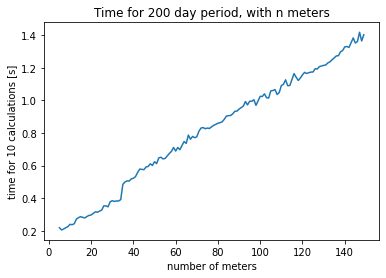

In [90]:
plt.plot(arange(5,150), times_per_meter_n)
plt.xlabel("number of meters")
plt.ylabel("time for 10 calculations [s]")
plt.title("Time for 200 day period, with n meters")
plt.show()

Now the time period dependancy.

In [97]:
meters=generate_meters(10)
consumption_lists = [
    generate_consumption(meters, str(first_day), str(first_day + timedelta(days=n)))
    for n in range(1,700)
]

In [98]:
times_per_period = []
for cons in consumption_lists:
    start=time()
    for _ in range(5): calculate_transporation_cost(meters, cons)
    stop=time()
    times_per_period.append(stop-start)

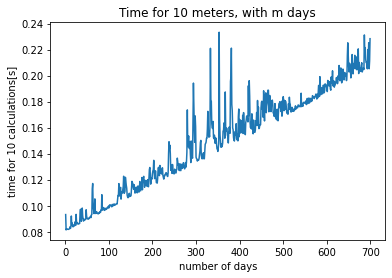

In [99]:
plt.plot(arange(1,700), times_per_period)
plt.xlabel("number of days")
plt.ylabel("time for 10 calculations[s]")
plt.title("Time for 10 meters, with m days")
plt.show()

## Excersise 5: Conclusions 



First of all, the generation of mock data can be probably a bit more efficient. The most expensive step is here loading the data from numpy arrays into the Pandas dataframe. Maybe using a generator function for each row could be faster. But that's not important for now.

For the calculation of the **transportation cost**, we see that, due to using vectorized Pandas function everywhere, it is quite efficient already. The calculation time is more or less **linearly dependent on the number of meters** in the dataset. The time period is also a linear factor, with some outliers. 

When we look at the individual steps of the function with the line profiler, the most expensive steps are the big merges, and the big filterings. The roundabout way in which I merged on the latest date of `rates` and the interval of the annual rate is probably a big factor here. Especially the full outer merge that is needed takes time and memory. I have a feeling that there is an obvious and much more efficient way to do this that I missed.

There can be probably some easy optimalizations if some steps are combined, e.g. the filtering on date and on annual rate. 

In [110]:
def calculate_tc_optim(meters: pd.DataFrame, consumption: pd.DataFrame) -> pd.DataFrame:
    """Calculate Transportation Cost Table, provided the meters and the cunsomption forecast."""

    # add meter info
    result = pd.merge(consumption, meters, on="Meter ID", how="left")

    # full outer merge with rates
    result = pd.merge(
        result,
        rates,
        on="Exit Zone",
        how="left",
        suffixes=("_consumption", "_rates"),
    )

    # filter by last date in rates
    result = (
        result[
            (result.Date_consumption
            >= result.Date_rates)
            & (result["Annual Quantity (kWh)"].between(
                result["Annual Quantity (Min)"], result["Annual Quantity (Max)"]
            ))
        ]
        .sort_values("Date_rates")
        .groupby(["Date_consumption", "Meter ID"])
        .last()
    )

    # calculate cost per meter per day
    result["cost"] = result["kWh"] * result["Rate (p/kWh)"]

    # aggregate and rename column names
    result = result.groupby("Meter ID")[["kWh", "cost"]].sum().round(2)
    result.columns = ("Total Estimated Consumption (kWh)", "Total Cost (£)")

    return result

In [114]:
test_meters=generate_meters(100)
test_consumption=generate_consumption(test_meters, str(rates.Date.min().date()), str(rates.Date.max().date()))

In [116]:
%%timeit
calculate_transporation_cost(test_meters, test_consumption)

734 ms ± 7.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [115]:
%%timeit 
calculate_tc_optim(test_meters, test_consumption)

700 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


That's a bit faster at least.